### Импортируем библиотеки

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

### Читаем датасет

In [3]:
df = pd.read_csv("bank.csv", sep=";")

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### Смотрим метадату

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


### Размерность датасета

In [6]:
df.shape

(4521, 17)

### Проверяем пустые поля

In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
df["education"].value_counts()

education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64

<Axes: xlabel='education', ylabel='count'>

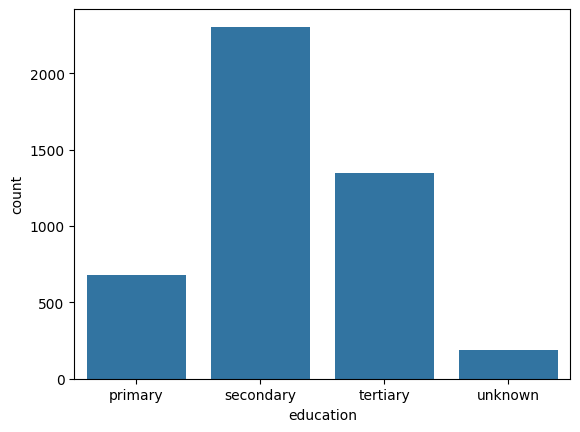

In [9]:
sns.countplot(x="education", data=df)

In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [11]:
df["job"].value_counts()

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64

<Axes: xlabel='marital', ylabel='count'>

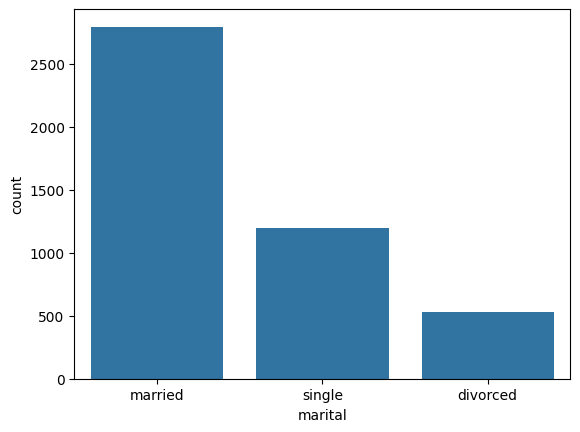

In [12]:
sns.countplot(x="marital", data=df)

<Axes: xlabel='poutcome', ylabel='count'>

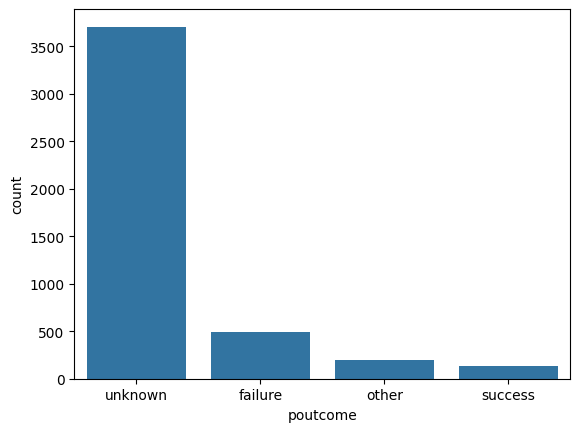

In [13]:
sns.countplot(x="poutcome", data=df)

In [14]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

<Axes: xlabel='default', ylabel='count'>

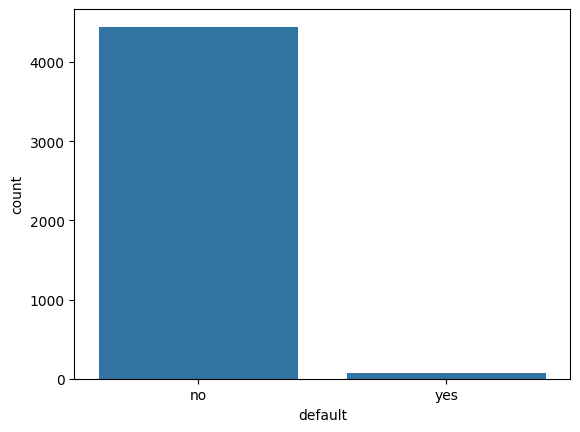

In [15]:
sns.countplot(x="default", data=df)

<Axes: xlabel='housing', ylabel='count'>

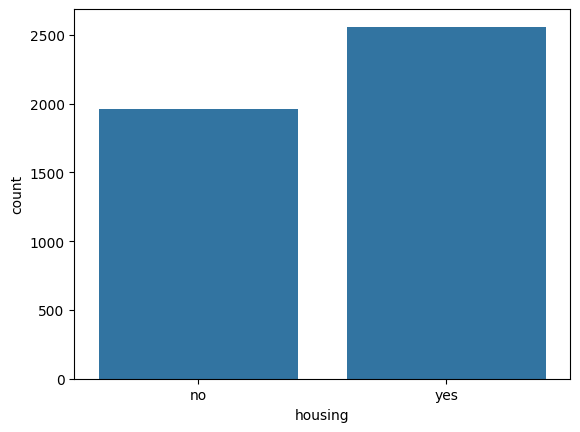

In [16]:
sns.countplot(x="housing", data=df)

<Axes: xlabel='campaign', ylabel='count'>

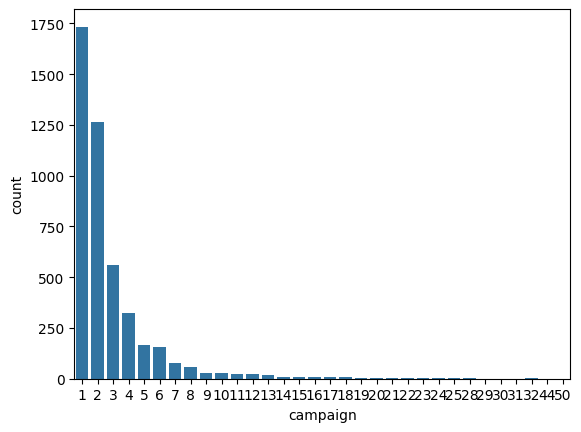

In [17]:
sns.countplot(x="campaign", data=df)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


<Axes: xlabel='y', ylabel='count'>

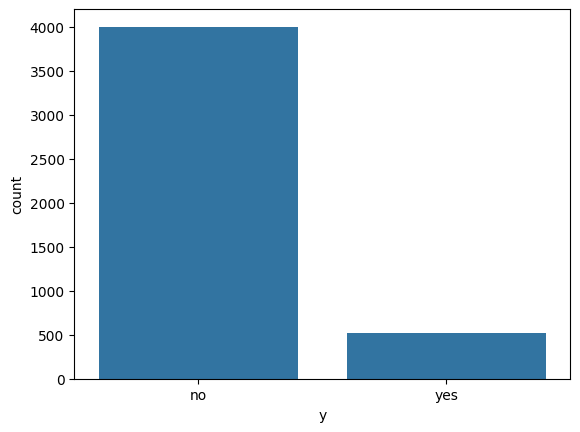

In [19]:
sns.countplot(x="y", data=df)

### Проверяем дупликаты

In [ ]:
duplicates = df.duplicated()
print("\nDuplicate rows:")
print(df[duplicates])


Duplicate rows:
Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []


### Дупликатов не найдено

In [21]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().any())
print ("\nUnique values :  \n",df.nunique())

Rows     :  4521
Columns  :  17

Features : 
 ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

Missing values :   age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

Unique values :  
 age            67
job            12
marital         3
education       4
default         2
balance      2353
housing         2
loan            2
contact         3
day            31
month          12
duration      875
campaign       32
pdays         292
previous       24
poutcome        4
y               2
dtype: int64


### Обозначаем numerical и categorical колонки

In [ ]:
numerical_cols = df.select_dtypes(exclude="object").columns

numerical_cols

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [ ]:
categorical_cols = df.select_dtypes(include="object").columns

categorical_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

### Одномерный анализ данных

In [ ]:

def visualize_numerical_features(df):
    numerical_features = df.select_dtypes(include=['int64', 'float64'])

    num_cols = len(numerical_features.columns)
    num_rows = (num_cols // 2) + (num_cols % 2)

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, 4*num_rows))

    for i, feature in enumerate(numerical_features.columns):
        row = i // 2
        col = i % 2
        ax = axes[row, col]

        sns.histplot(data=df, x=feature, kde=True, ax=ax)
        ax.set_title(f"Distribution of {feature}")
        ax.set_xlabel(feature)
        ax.set_ylabel("Frequency")

    if num_cols % 2 != 0:
        axes[-1, -1].axis("off")

    plt.tight_layout()
    plt.show()

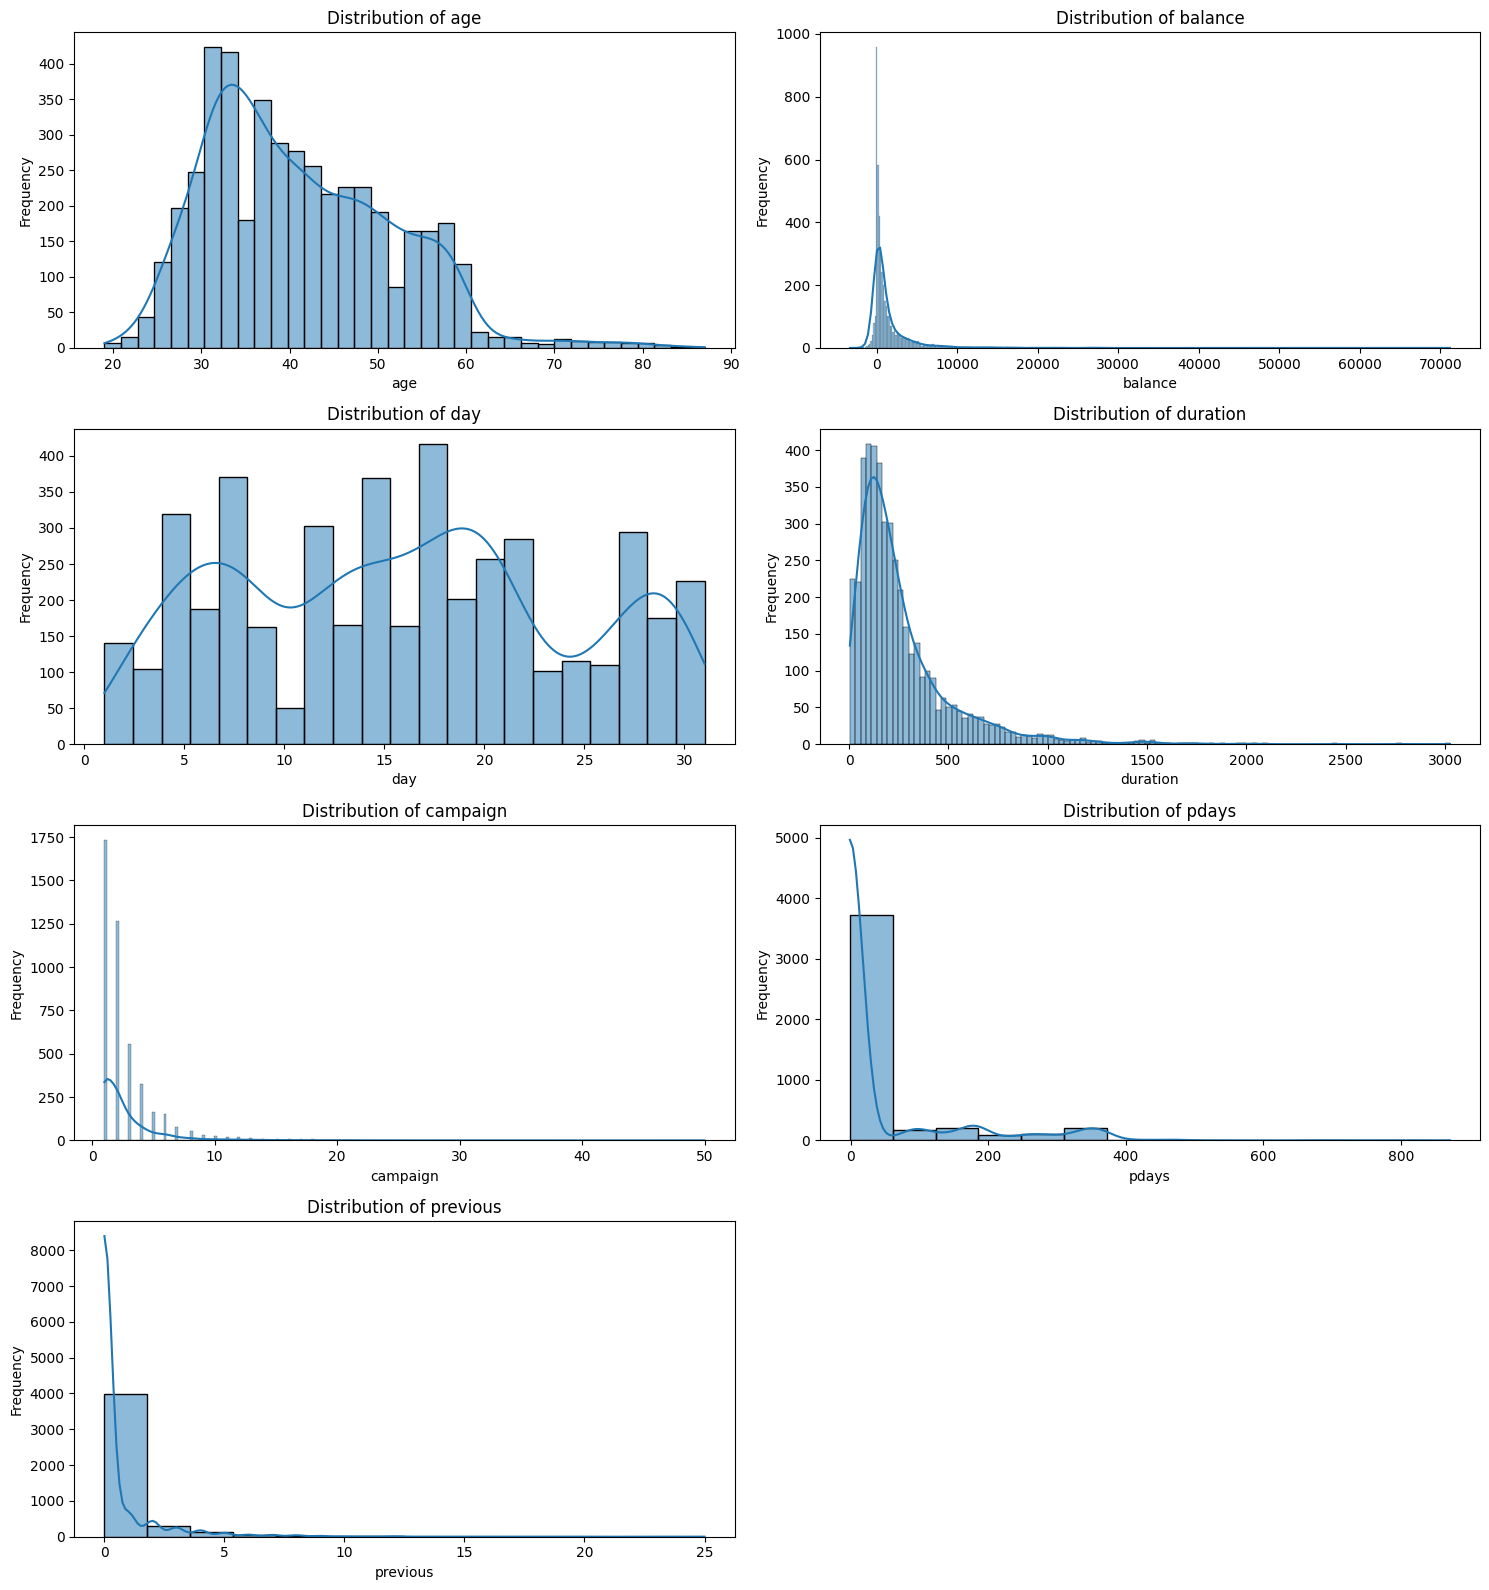

In [25]:
visualize_numerical_features(df)

### Проверяем выбросы

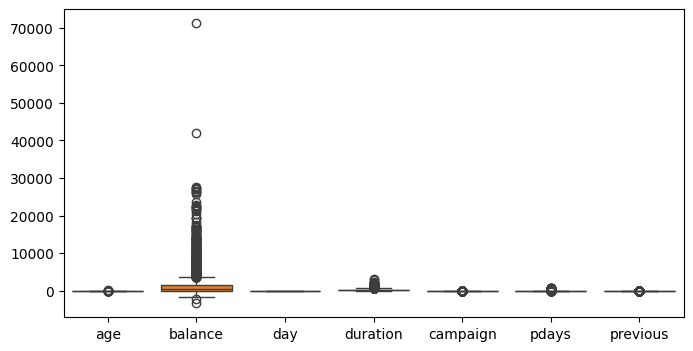

In [26]:
plt.figure(figsize=(8, 4))
sns.boxplot(df)
plt.show()

### Выбросы обнаружены

### Одномерный анализ категориальных признаков

In [27]:

## Categorical features

def visualize_categorical_features(df):
    categorical_features = df.select_dtypes(include=['object', 'category'])

    cat_cols = len(categorical_features.columns)
    cat_rows = (cat_cols // 2) + (cat_cols % 2)

    fig, axes = plt.subplots(cat_rows, 2, figsize=(12, 4*cat_rows))

    for i, feature in enumerate(categorical_features.columns):
        row = i // 2
        col = i % 2
        ax = axes[row, col]

        sns.countplot(x=feature, data=df, ax=ax)
        ax.set_title(f"Countplot of {feature}")
        ax.set_xlabel(feature)
        ax.set_ylabel("Count")

    # Hide empty subplots if the number of features is odd
    if cat_cols % 2 != 0:
        axes[-1, -1].axis("off")

    plt.tight_layout()

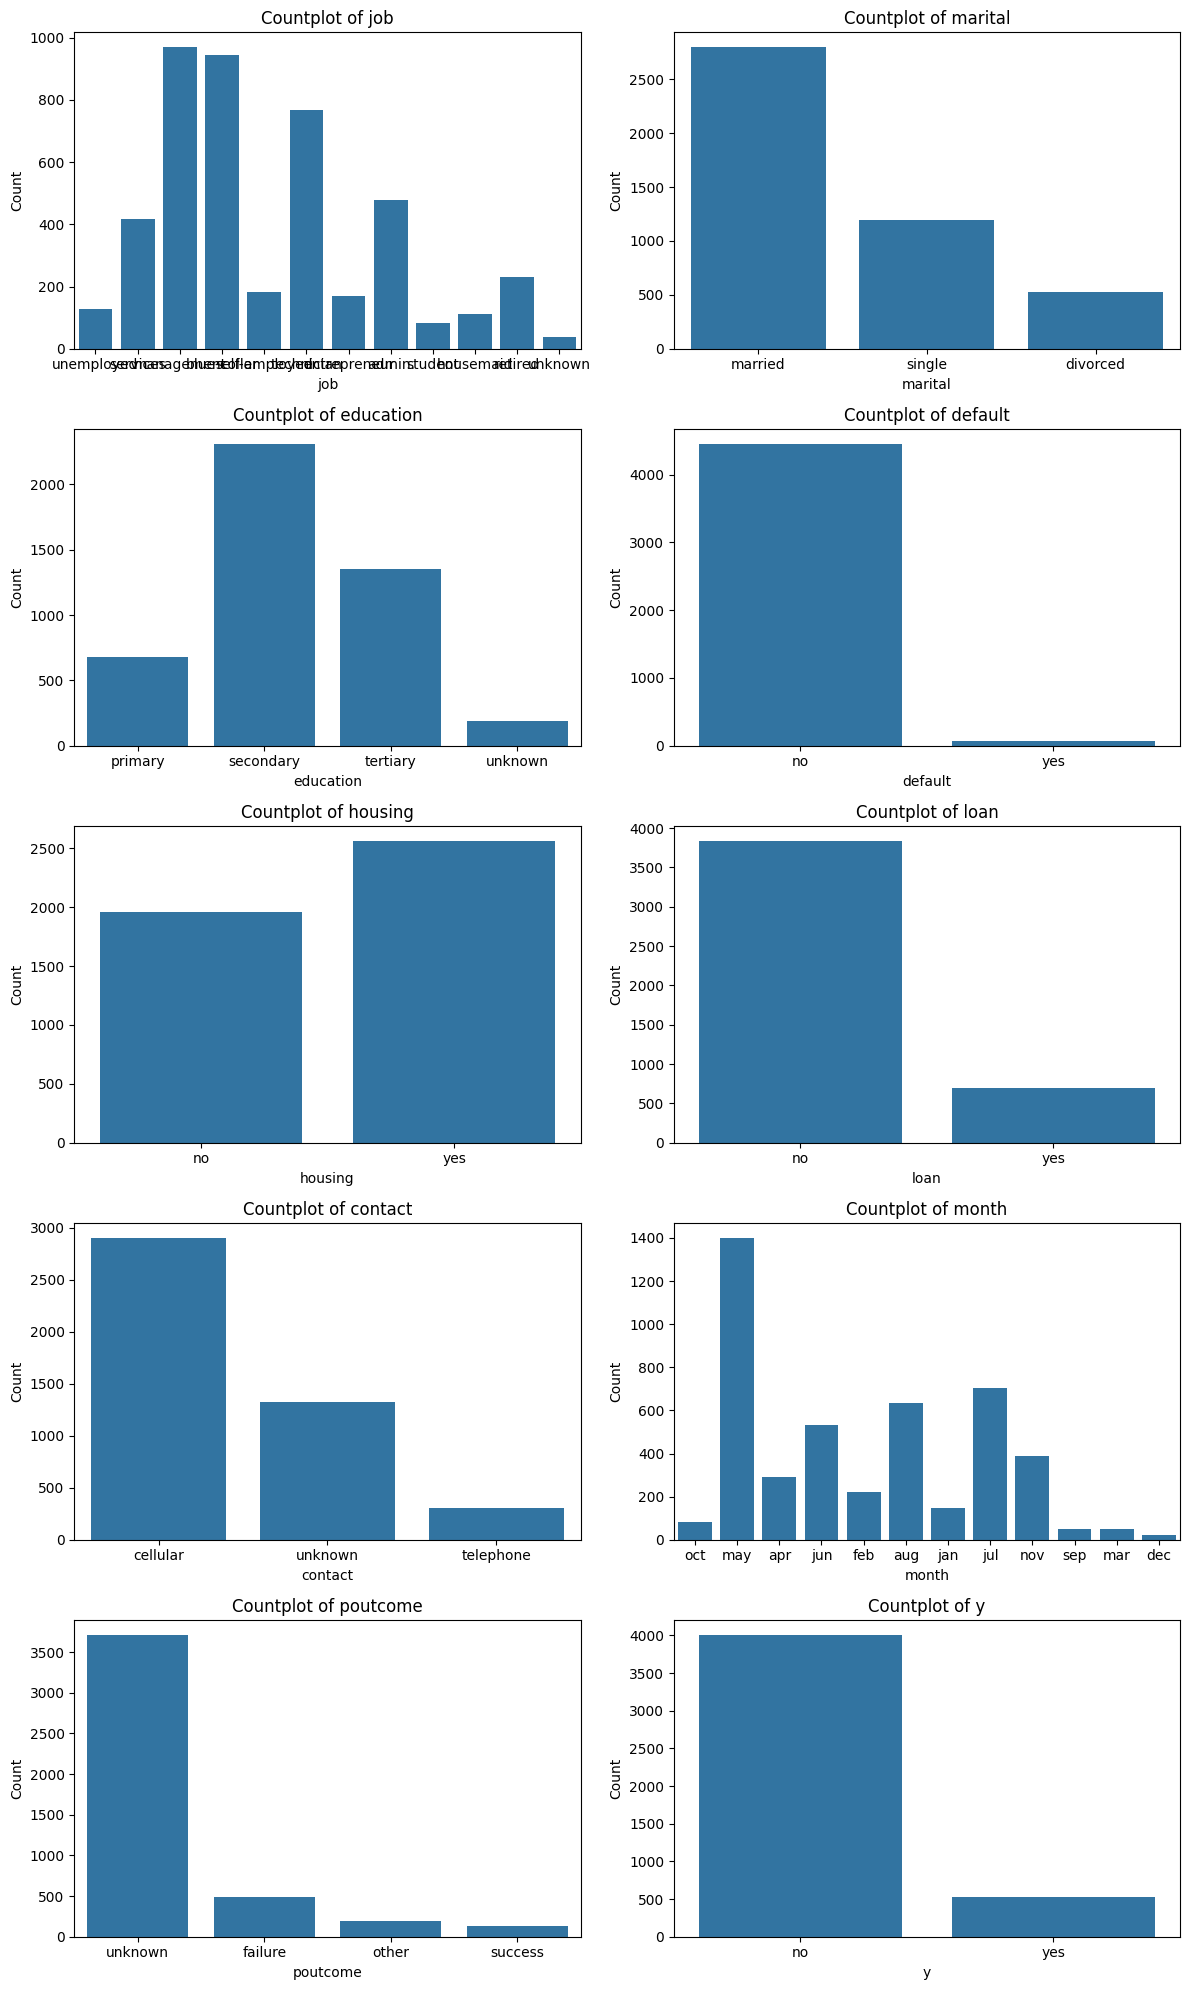

In [28]:
visualize_categorical_features(df)

In [29]:
df.shape

(4521, 17)

### Проверяем мультиколлинеарность признаков

In [30]:

def check_multicollinearity(df, threshold=0.8):
    df = pd.DataFrame(df)  # Convert dataset to a DataFrame if needed
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df_numeric = df[numeric_cols]
    corr_matrix = df_numeric.corr().abs()  # Calculate the correlation matrix
    cols = corr_matrix.columns
    multicollinear_features = set()

    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            if corr_matrix.iloc[i, j] >= threshold:
                multicollinear_features.add(cols[i])
                multicollinear_features.add(cols[j])

    # Plotting the correlation heatmap
    plt.figure(figsize=(15,10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

    return multicollinear_features

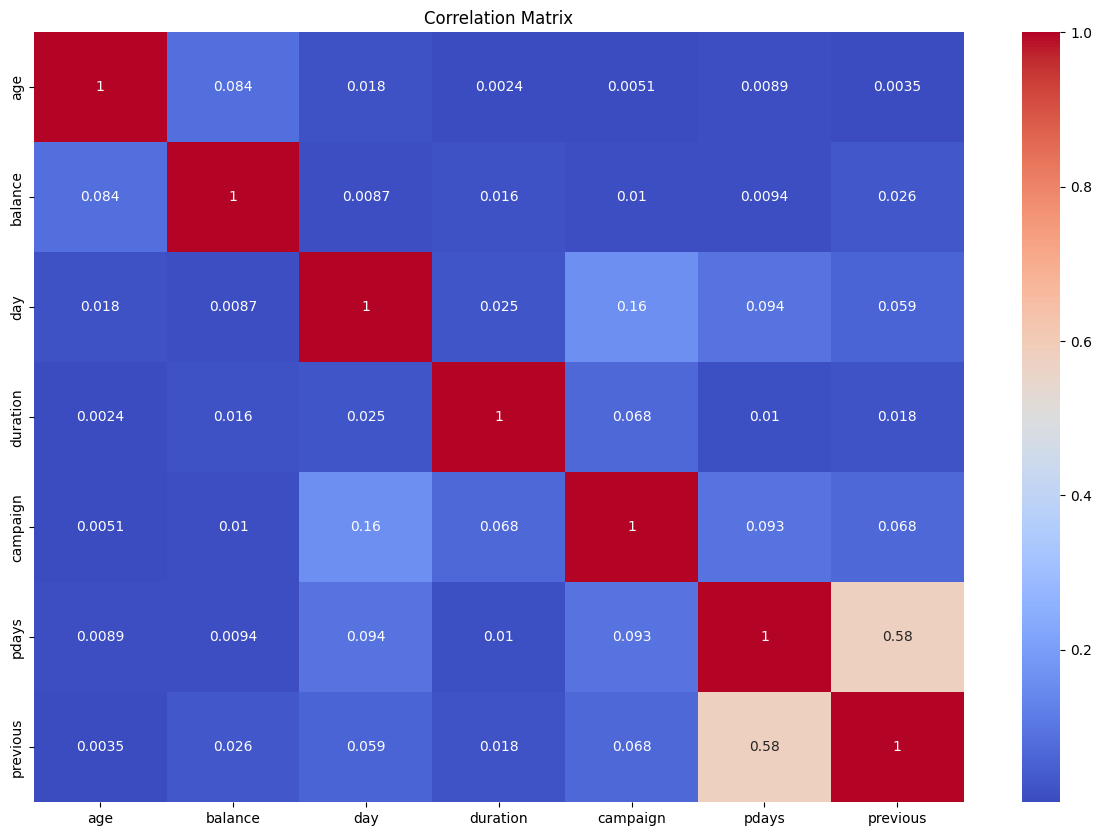

set()

In [31]:
check_multicollinearity(df)

### Мультиколлинеарность не обнаружена

### Проверка выбросов

In [ ]:
def detect_outliers(df, columns, threshold=3):
    columns_with_outliers = []

    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1

        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr

        column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        if not column_outliers.empty:
            columns_with_outliers.append(column)
            print(f"Outliers found in column '{column}'.")

    if not columns_with_outliers:
        print("No outliers found.")

    return columns_with_outliers

In [33]:
detect_outliers(df, columns=numerical_cols)

Outliers found in column 'balance'.
Outliers found in column 'duration'.
Outliers found in column 'campaign'.
Outliers found in column 'pdays'.
Outliers found in column 'previous'.


['balance', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
## Drop the Outliers

def drop_outliers(df, columns, threshold=3, save_clean_df=True):
    columns_with_outliers = []

    for column in columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1

            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr

            column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

            if not column_outliers.empty:
                columns_with_outliers.append(column)
                print(f"Outliers found in column '{column}'.")
                df = df[~df.index.isin(column_outliers.index)]
        else:
            print(f"Skipping column '{column}' as it contains non-numeric data.")

    if not columns_with_outliers:
        print("No outliers found.")
    else:
        print("Outliers dropped from the DataFrame.")

    if save_clean_df:
        clean_df_filename = "clean_dataframe.csv" 
        df.to_csv(clean_df_filename, index=False)
        print(f"Clean DataFrame saved to '{clean_df_filename}'.")

    raw_data = df.copy()

    return df, raw_data



columns = df.columns
threshold = 3
clean_data, raw_data = drop_outliers(df, columns, threshold)

print("Original DataFrame:")
print(raw_data)

print("\nDataFrame without outliers:")
print(clean_data)

Skipping column 'job' as it contains non-numeric data.
Skipping column 'marital' as it contains non-numeric data.
Skipping column 'education' as it contains non-numeric data.
Skipping column 'default' as it contains non-numeric data.
Outliers found in column 'balance'.
Skipping column 'housing' as it contains non-numeric data.
Skipping column 'loan' as it contains non-numeric data.
Skipping column 'contact' as it contains non-numeric data.
Skipping column 'month' as it contains non-numeric data.
Outliers found in column 'duration'.
Outliers found in column 'campaign'.
Outliers found in column 'pdays'.
Skipping column 'poutcome' as it contains non-numeric data.
Skipping column 'y' as it contains non-numeric data.
Outliers dropped from the DataFrame.
Clean DataFrame saved to 'clean_dataframe.csv'.
Original DataFrame:
      age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
3      30     man

In [35]:
clean_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no


In [36]:
clean_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [37]:
clean_data.shape

(3281, 17)

In [38]:
df = clean_data.copy()

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no


In [ ]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != "O"]

categorical_features = [feature for feature in df.columns if df[feature].dtypes == "O"]

print("We have {} numerical features: {}".format(len(numeric_features), numeric_features))

print("----------------------------------------------------------------------------------")

print("We have {} categorical features: {}".format(len(categorical_features), categorical_features))

We have 7 numerical features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
----------------------------------------------------------------------------------
We have 10 categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [ ]:
print("Number of duplicates: ", clean_data.duplicated().sum())
print("Unique values per column:")
clean_data.nunique()

Number of duplicates:  0
Unique values per column:


age            66
job            12
marital         3
education       4
default         2
balance      1801
housing         2
loan            2
contact         3
day            31
month          12
duration      726
campaign        9
pdays           1
previous        1
poutcome        1
y               2
dtype: int64

In [41]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no


### Предварительная обработка данных с помощью конвейерных и колоночных преобразователей

In [42]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler, OrdinalEncoder, LabelEncoder, RobustScaler

In [43]:
numerical_columns = df.select_dtypes(exclude="object").columns

numerical_columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [44]:
categorical_columns = df.select_dtypes(include="object").columns


categorical_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [45]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

<Axes: xlabel='y', ylabel='count'>

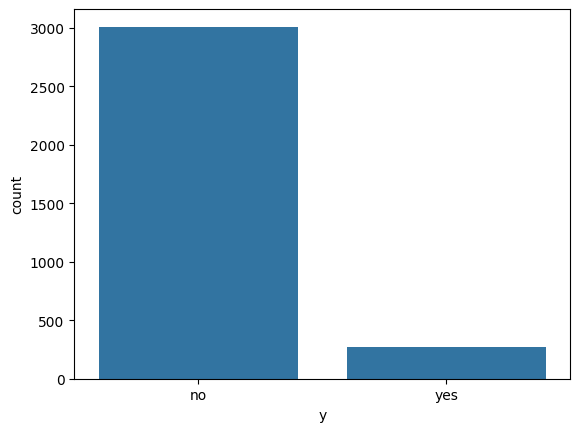

In [46]:
sns.countplot(x="y", data=df)

### Разделим данные на X и y

In [47]:
X = df.drop(columns=["y"], axis=1)

y = df["y"]

In [48]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown


In [49]:
X.shape

(3281, 16)

In [50]:
y

0       no
3       no
4       no
7       no
8       no
        ..
4512    no
4513    no
4515    no
4516    no
4517    no
Name: y, Length: 3281, dtype: object

In [51]:
y.shape

(3281,)

In [ ]:
y= y.replace({'no': 1, 'yes': 0})

In [53]:
y.value_counts()

y
1    3011
0     270
Name: count, dtype: int64

In [ ]:
numeric_features = X.select_dtypes(exclude="object").columns
numeric_features

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [ ]:
categorical_features = X.select_dtypes(include="object").columns
categorical_features

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [ ]:
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[
    ("OrdinalEncoder", OrdinalEncoder(), categorical_features),
    ("RobustScaler", RobustScaler(), numeric_features)
], remainder="drop")

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
X_train = transformer.fit_transform(X_train)

In [59]:
X_test = transformer.transform(X_test)

In [60]:
X_train.shape, X_test.shape

((2624, 16), (657, 16))

In [61]:
X_test

array([[ 1. ,  1. ,  1. , ...,  0. ,  0. ,  0. ],
       [ 2. ,  1. ,  2. , ...,  1. ,  0. ,  0. ],
       [ 1. ,  1. ,  0. , ..., -0.5,  0. ,  0. ],
       ...,
       [ 5. ,  1. ,  2. , ..., -0.5,  0. ,  0. ],
       [ 1. ,  1. ,  1. , ...,  0.5,  0. ,  0. ],
       [ 4. ,  2. ,  2. , ...,  1. ,  0. ,  0. ]])

In [62]:
X_train

array([[ 4. ,  1. ,  2. , ...,  0.5,  0. ,  0. ],
       [ 9. ,  1. ,  2. , ..., -0.5,  0. ,  0. ],
       [ 5. ,  1. ,  0. , ..., -0.5,  0. ,  0. ],
       ...,
       [ 9. ,  2. ,  1. , ...,  0. ,  0. ,  0. ],
       [ 1. ,  1. ,  0. , ..., -0.5,  0. ,  0. ],
       [ 7. ,  0. ,  1. , ..., -0.5,  0. ,  0. ]])

In [63]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(),
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

### Создание функции для обучения и оценки моделей

In [65]:
from sklearn.metrics import (accuracy_score,
                             f1_score, precision_score, recall_score,
                             roc_auc_score)

In [ ]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) #Accuracy
    f1 = f1_score(true, predicted) #F1-score
    precision = precision_score(true, predicted) #Precision
    recall = recall_score(true, predicted)  #Recall
    roc_auc = roc_auc_score(true, predicted) #Roc
    return acc, f1 , precision, recall, roc_auc

In [ ]:
def evaluate_models(X, y, models):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    models_list = []
    accuracy_list = []
    f1_score_list = []
    precision_list = []
    recall_list = []
    rocauc_score_list = []

    for model_name, model in models.items():
        model.fit(X_train, y_train) # Train model

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1, model_train_precision, \
        model_train_recall, model_train_rocauc_score = evaluate_clf(y_train, y_train_pred)

        # Test set performance
        model_test_accuracy, model_test_f1, model_test_precision, \
        model_test_recall, model_test_rocauc_score = evaluate_clf(y_test, y_test_pred)

        print(model_name)
        models_list.append(model_name)

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1))
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- ROC AUC Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- ROC AUC Score: {:.4f}'.format(model_test_rocauc_score))

        print('=' * 35)
        print('\n')

        accuracy_list.append(model_test_accuracy)
        f1_score_list.append(model_test_f1)
        precision_list.append(model_test_precision)
        recall_list.append(model_test_recall)
        rocauc_score_list.append(model_test_rocauc_score)

    report = pd.DataFrame({
        'Model Name': models_list,
        'Accuracy': accuracy_list,
        'F1 Score': f1_score_list,
        'Precision': precision_list,
        'Recall': recall_list,
        'ROC AUC Score': rocauc_score_list
    }).sort_values(by='Precision', ascending=False)

    return report

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from imblearn.over_sampling import SMOTE
import mlflow
import mlflow.sklearn
import warnings
warnings.filterwarnings('ignore')

def evaluate_clf(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    try:
        rocauc = roc_auc_score(y_true, y_pred)
    except:
        rocauc = np.nan 
    return accuracy, f1, precision, recall, rocauc

def evaluate_models(X, y, models):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    smote = SMOTE(random_state=42)
    try:
        X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
        print("SMOTE applied: Training data balanced")
        print(f"Original class distribution: {pd.Series(y_train).value_counts().to_dict()}")
        print(f"Balanced class distribution: {pd.Series(y_train_res).value_counts().to_dict()}")
    except Exception as e:
        print(f"SMOTE failed: {e}. Using original training data.")
        X_train_res, y_train_res = X_train, y_train

    models_list = []
    accuracy_list = []
    f1_score_list = []
    precision_list = []
    recall_list = []
    rocauc_score_list = []

    mlflow.set_experiment("Credit_Scoring_Models")

    with mlflow.start_run():
        for model_name, model in models.items():
            model.fit(X_train_res, y_train_res)
            y_train_pred = model.predict(X_train_res)
            y_test_pred = model.predict(X_test)
            y_train_proba = model.predict_proba(X_train_res)[:, 1] if hasattr(model, 'predict_proba') else y_train_pred
            y_test_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_test_pred
            model_train_accuracy, model_train_f1, model_train_precision, \
            model_train_recall, _ = evaluate_clf(y_train_res, y_train_pred)
            model_train_rocauc = roc_auc_score(y_train_res, y_train_proba) if hasattr(model, 'predict_proba') else np.nan
            model_test_accuracy, model_test_f1, model_test_precision, \
            model_test_recall, _ = evaluate_clf(y_test, y_test_pred)
            model_test_rocauc = roc_auc_score(y_test, y_test_proba) if hasattr(model, 'predict_proba') else np.nan
            print(model_name)
            models_list.append(model_name)

            print('Model performance for Training set')
            print("- Accuracy: {:.4f}".format(model_train_accuracy))
            print('- F1 score: {:.4f}'.format(model_train_f1))
            print('- Precision: {:.4f}'.format(model_train_precision))
            print('- Recall: {:.4f}'.format(model_train_recall))
            print('- ROC AUC Score: {:.4f}'.format(model_train_rocauc))

            print('----------------------------------')

            print('Model performance for Test set')
            print('- Accuracy: {:.4f}'.format(model_test_accuracy))
            print('- F1 score: {:.4f}'.format(model_test_f1))
            print('- Precision: {:.4f}'.format(model_test_precision))
            print('- Recall: {:.4f}'.format(model_test_recall))
            print('- ROC AUC Score: {:.4f}'.format(model_test_rocauc))

            print('=' * 35)
            print('\n')

            accuracy_list.append(model_test_accuracy)
            f1_score_list.append(model_test_f1)
            precision_list.append(model_test_precision)
            recall_list.append(model_test_recall)
            rocauc_score_list.append(model_test_rocauc)

            mlflow.log_metric(f"{model_name}_Test_Accuracy", model_test_accuracy)
            mlflow.log_metric(f"{model_name}_Test_F1", model_test_f1)
            mlflow.log_metric(f"{model_name}_Test_Precision", model_test_precision)
            mlflow.log_metric(f"{model_name}_Test_Recall", model_test_recall)
            mlflow.log_metric(f"{model_name}_Test_ROC_AUC", model_test_rocauc)
            mlflow.sklearn.log_model(model, model_name)

    report = pd.DataFrame({
        'Model Name': models_list,
        'Accuracy': accuracy_list,
        'F1 Score': f1_score_list,
        'Precision': precision_list,
        'Recall': recall_list,
        'ROC AUC Score': rocauc_score_list
    }).sort_values(by='Precision', ascending=False)

    report.to_csv('model_report.csv', index=False)
    mlflow.log_artifact('model_report.csv')

    return report

In [69]:
report = evaluate_models(X_train, y_train, models)

SMOTE applied: Training data balanced
Original class distribution: {1: 1944, 0: 155}
Balanced class distribution: {0: 1944, 1: 1944}
Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9067
- F1 score: 0.6299
- Precision: 0.7354
- Recall: 0.5983
- ROC AUC Score: 0.8612




2025/06/01 18:50:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8762
- F1 score: 0.6440
- Precision: 0.6453
- Recall: 0.6427
- ROC AUC Score: 0.6427




2025/06/01 18:50:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.9622
- F1 score: 0.9622
- Precision: 0.9622
- Recall: 0.9622
- ROC AUC Score: 0.9948
----------------------------------
Model performance for Test set
- Accuracy: 0.9048
- F1 score: 0.6693
- Precision: 0.7226
- Recall: 0.6410
- ROC AUC Score: 0.8636




2025/06/01 18:50:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logistic Regression
Model performance for Training set
- Accuracy: 0.8125
- F1 score: 0.8125
- Precision: 0.8126
- Recall: 0.8125
- ROC AUC Score: 0.8871
----------------------------------
Model performance for Test set
- Accuracy: 0.8038
- F1 score: 0.6436
- Precision: 0.6236
- Recall: 0.7514
- ROC AUC Score: 0.8494




2025/06/01 18:50:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.9426
- F1 score: 0.9425
- Precision: 0.9485
- Recall: 0.9426
- ROC AUC Score: 0.9994
----------------------------------
Model performance for Test set
- Accuracy: 0.8381
- F1 score: 0.6599
- Precision: 0.6352
- Recall: 0.7266
- ROC AUC Score: 0.7755




2025/06/01 18:50:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


XGBClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- ROC AUC Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8990
- F1 score: 0.5997
- Precision: 0.6834
- Recall: 0.5766
- ROC AUC Score: 0.8656




2025/06/01 18:50:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


CatBoosting Classifier
Model performance for Training set
- Accuracy: 0.9961
- F1 score: 0.9961
- Precision: 0.9962
- Recall: 0.9961
- ROC AUC Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9048
- F1 score: 0.6173
- Precision: 0.7226
- Recall: 0.5885
- ROC AUC Score: 0.8613




2025/06/01 18:50:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


AdaBoost Classifier
Model performance for Training set
- Accuracy: 0.9051
- F1 score: 0.9051
- Precision: 0.9053
- Recall: 0.9051
- ROC AUC Score: 0.9721
----------------------------------
Model performance for Test set
- Accuracy: 0.8457
- F1 score: 0.6217
- Precision: 0.6088
- Recall: 0.6433
- ROC AUC Score: 0.8071




2025/06/01 18:50:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [70]:
report

,Model Name,Accuracy,F1 Score,Precision,Recall,ROC AUC Score
0,Random Forest,0.906667,0.629904,0.735396,0.598349,0.861215
6,CatBoosting Classifier,0.904762,0.617347,0.722644,0.588546,0.861339
2,Gradient Boosting,0.904762,0.669296,0.722639,0.641040,0.863614
5,XGBClassifier,0.899048,0.599692,0.683416,0.576632,0.865558
1,Decision Tree,0.876190,0.643971,0.645263,0.642715,0.642715
4,K-Neighbors Classifier,0.838095,0.659935,0.635213,0.726607,0.775523
3,Logistic Regression,0.803810,0.643589,0.623592,0.751365,0.849425
7,AdaBoost Classifier,0.845714,0.621694,0.608791,0.643336,0.807065


In [ ]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold

def xgb_objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 100, 500, step=100)
    max_depth = trial.suggest_int("max_depth", 3, 10)
    learning_rate = trial.suggest_loguniform("learning_rate", 0.01, 0.1)
    min_child_weight = trial.suggest_int("min_child_weight", 1, 10)
    subsample = trial.suggest_float("subsample", 0.5, 1.0)
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 1.0)
    xgb = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        min_child_weight=min_child_weight,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        random_state=42,
    )

    scores = cross_val_score(
        xgb,
        X_train,
        y_train,
        cv=KFold(n_splits=10, shuffle=True, random_state=42),
        scoring="f1",
        error_score="raise"
    )

    return scores.mean()

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(xgb_objective, n_trials=10)
best_params = study.best_params
best_score = study.best_value
print(f"Best score: {best_score}\n")
print(f"Optimized parameters: {best_params}\n")

[I 2025-06-01 18:50:58,808] A new study created in memory with name: no-name-187de6f0-ec0a-44ff-99f0-df11bc13476c
[I 2025-06-01 18:50:59,587] Trial 0 finished with value: 0.958711752312657 and parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.07549159950459282, 'min_child_weight': 8, 'subsample': 0.916505558307552, 'colsample_bytree': 0.5803904457938667}. Best is trial 0 with value: 0.958711752312657.
[I 2025-06-01 18:51:02,165] Trial 1 finished with value: 0.9584920491752907 and parameters: {'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.04146380378225096, 'min_child_weight': 1, 'subsample': 0.5626229510059941, 'colsample_bytree': 0.5099903951780929}. Best is trial 0 with value: 0.958711752312657.
[I 2025-06-01 18:51:03,778] Trial 2 finished with value: 0.9592463397947155 and parameters: {'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.021177038281307695, 'min_child_weight': 4, 'subsample': 0.9187563176834839, 'colsample_bytree': 0.5063434454747178}

Best score: 0.9592463397947155

Optimized parameters: {'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.021177038281307695, 'min_child_weight': 4, 'subsample': 0.9187563176834839, 'colsample_bytree': 0.5063434454747178}



In [74]:

xgb = XGBClassifier(
    n_estimators = 200,
    max_depth = 5,
    min_child_weight = 4,

)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=4, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_preds = xgb.predict(X_test)

In [76]:
print("Final XGB Classifier Accuracy Score (Train) :", xgb.score(X_train,y_train))
print("Final XGB Classifier Accuracy Score (Test) :", accuracy_score(y_preds,y_test))

print("--------------------------------------------------------------------------------------")

print("Final XGB Classifier Accuracy Score (Train) :", xgb.score(X_train,y_train))
print("Final XGB Classifier Precision Score (Test) :", precision_score(y_preds,y_test))

print("----------------------------------------------------------------------------------------")

print("Final XGB Classifier Accuracy Score (Train) :", xgb.score(X_train,y_train))
print("Final XGB Classifier F1 Score (Test) :", f1_score(y_preds,y_test, average="weighted"))

Final XGB Classifier Accuracy Score (Train) : 0.9996189024390244
Final XGB Classifier Accuracy Score (Test) : 0.9071537290715372
--------------------------------------------------------------------------------------
Final XGB Classifier Accuracy Score (Train) : 0.9996189024390244
Final XGB Classifier Precision Score (Test) : 0.9679595278246206
----------------------------------------------------------------------------------------
Final XGB Classifier Accuracy Score (Train) : 0.9996189024390244
Final XGB Classifier F1 Score (Test) : 0.916439453248998


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

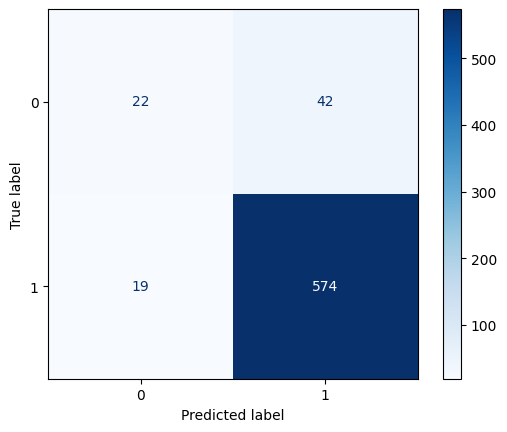

In [78]:
#plots Confusion matrix

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_preds))
disp.plot(cmap="Blues")

In [79]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.54      0.34      0.42        64
           1       0.93      0.97      0.95       593

    accuracy                           0.91       657
   macro avg       0.73      0.66      0.68       657
weighted avg       0.89      0.91      0.90       657




SHAP для Logistic Regression


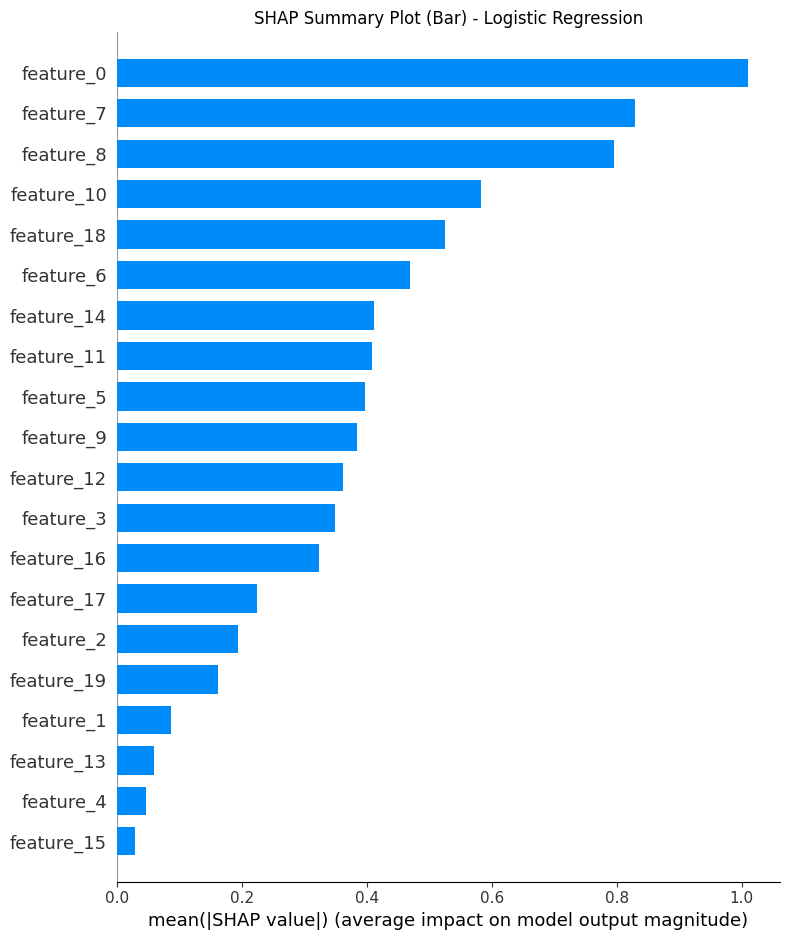

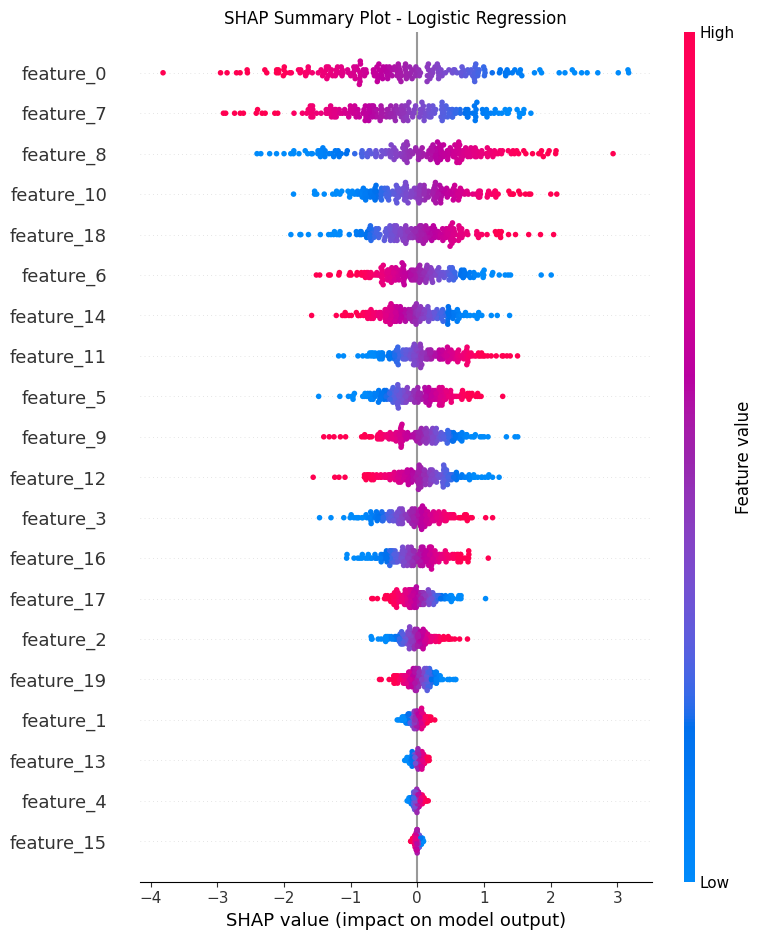


SHAP для Random Forest


<Figure size 640x480 with 0 Axes>

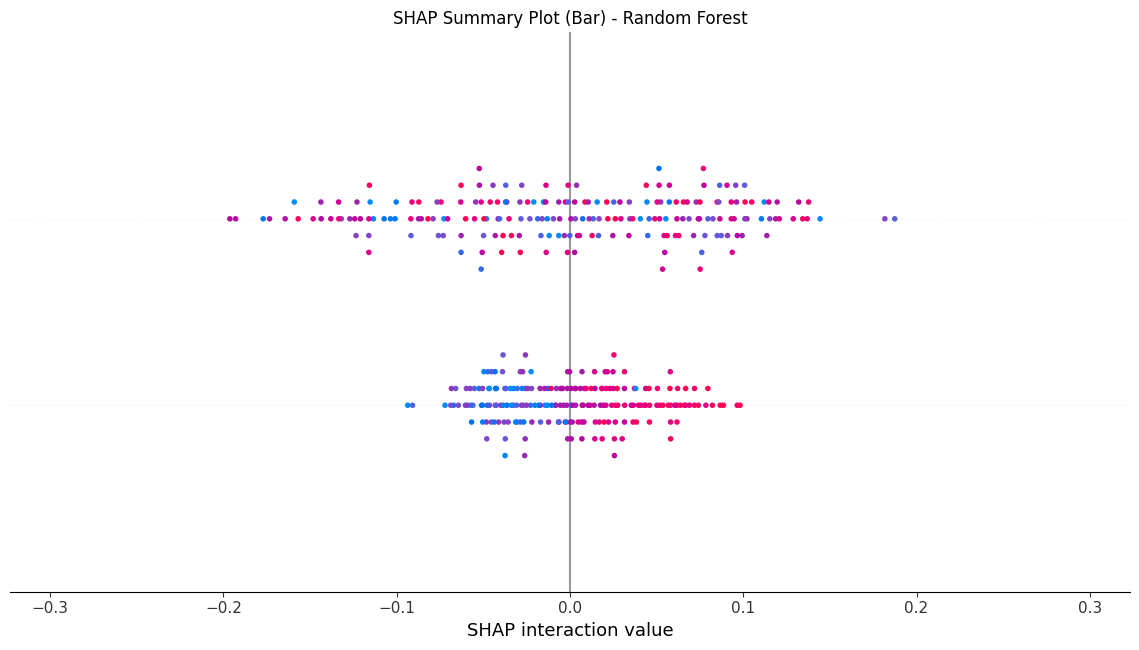

<Figure size 640x480 with 0 Axes>

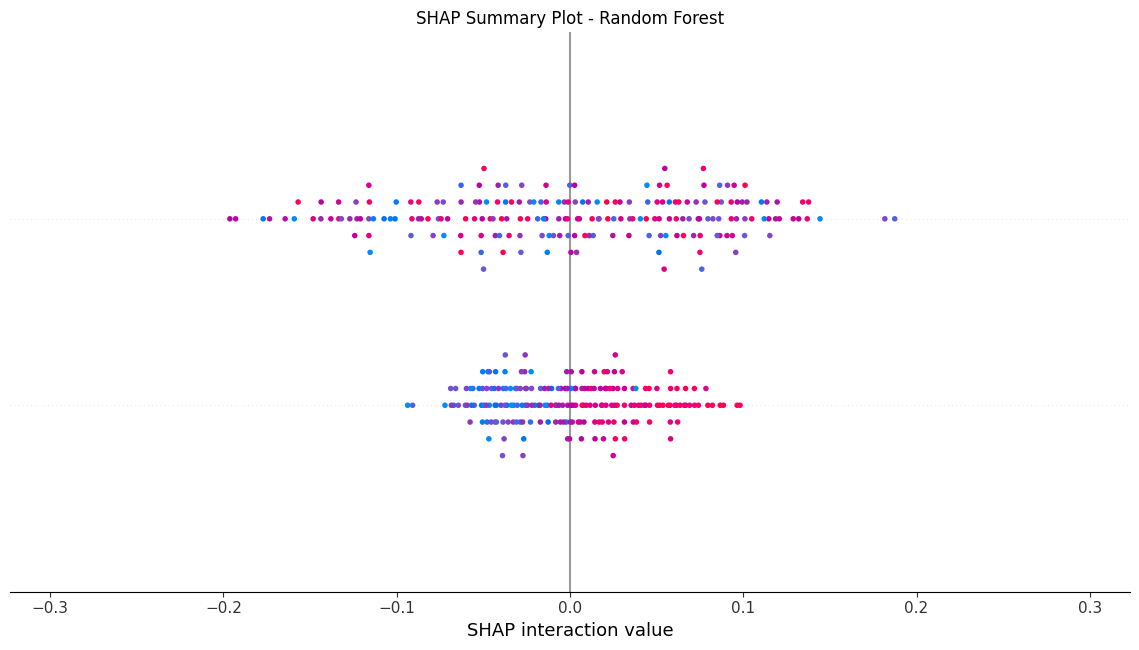


SHAP для Decision Tree


<Figure size 640x480 with 0 Axes>

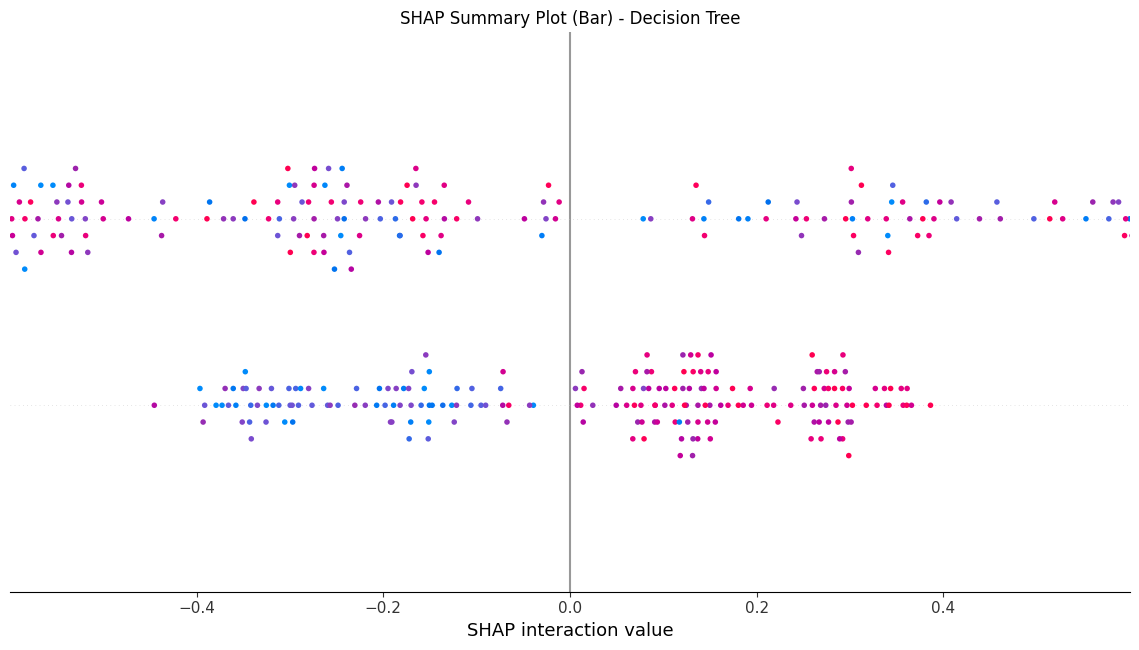

<Figure size 640x480 with 0 Axes>

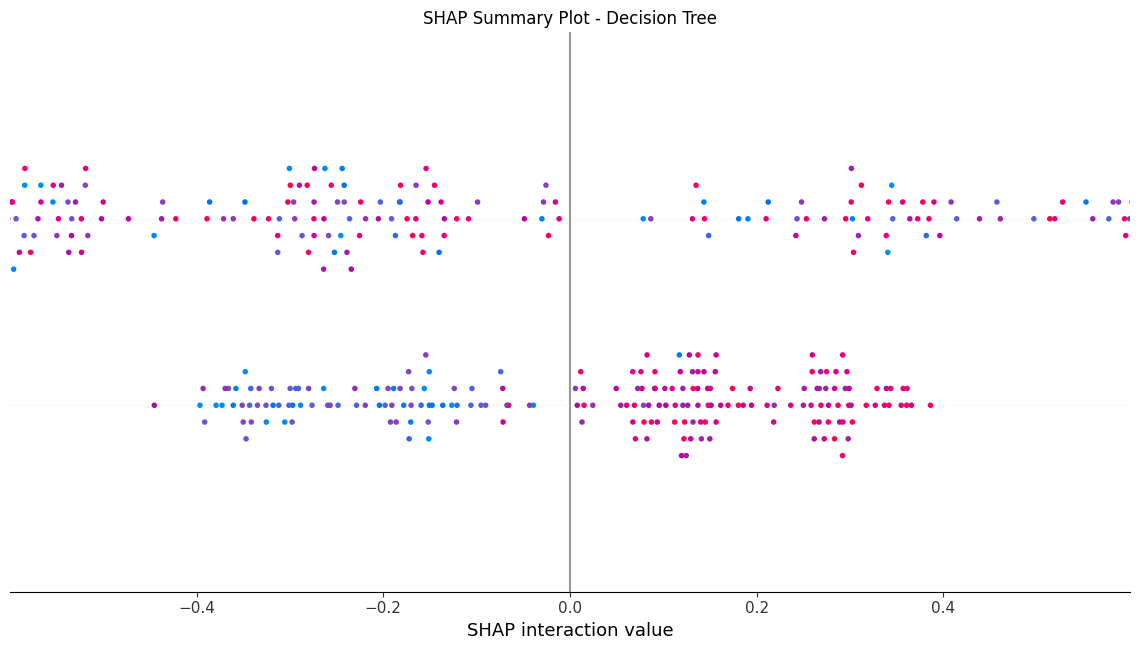


SHAP для Gradient Boosting


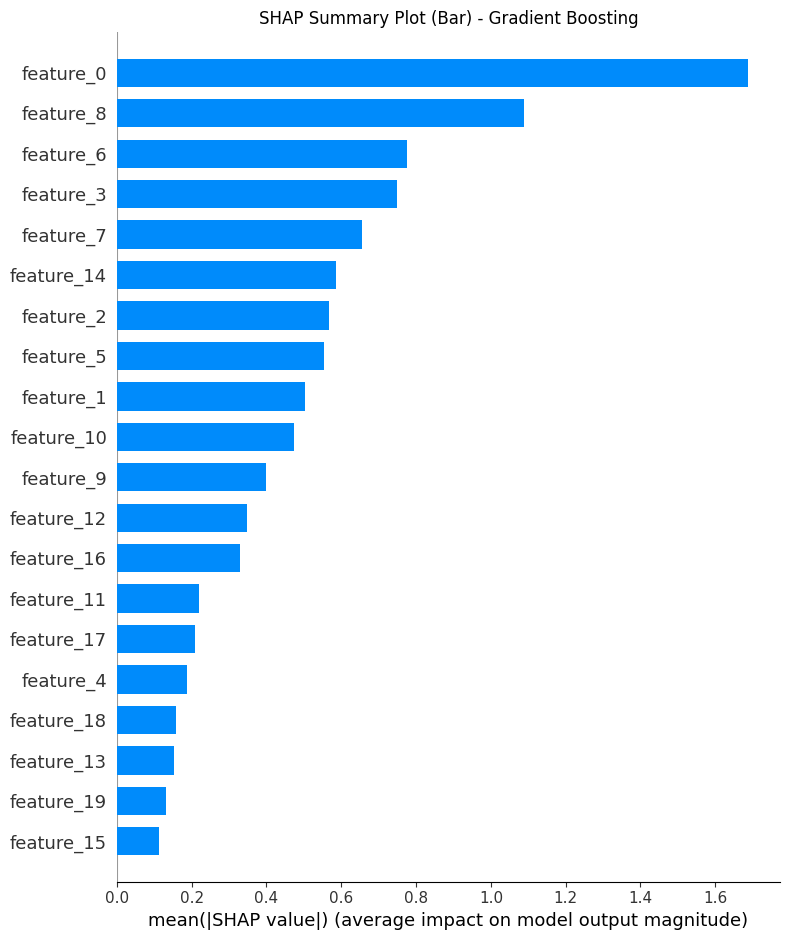

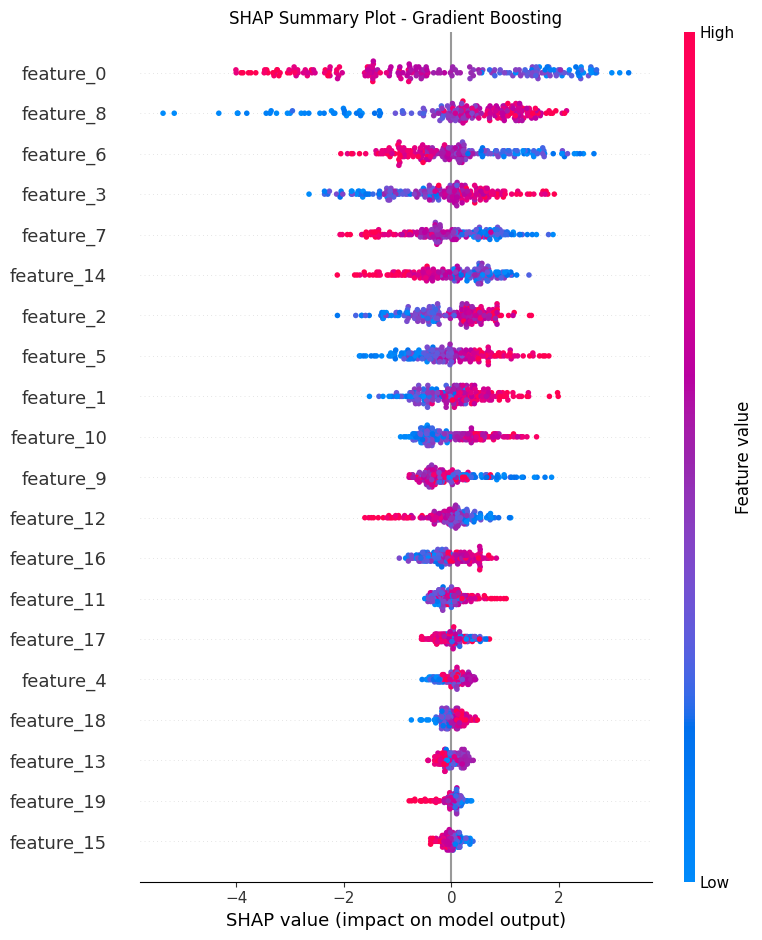

In [ ]:
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)
X = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(X.shape[1])])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": XGBClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)

shap.initjs()

for name, model in models.items():
    print(f"\nSHAP для {name}")
    
    if name == "Logistic Regression":
        explainer = shap.LinearExplainer(model, X_train)
    else:
        explainer = shap.TreeExplainer(model) if name in ["Random Forest", "Decision Tree", "Gradient Boosting"] else shap.KernelExplainer(model.predict_proba, X_train)

    shap_values = explainer.shap_values(X_test)
    if name == "Logistic Regression":
        shap_values = shap_values 
    else:
        shap_values = shap_values 

    plt.figure()
    shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
    plt.title(f"SHAP Summary Plot (Bar) - {name}")
    plt.tight_layout()
    plt.show()

    plt.figure()
    shap.summary_plot(shap_values, X_test, show=False)
    plt.title(f"SHAP Summary Plot - {name}")
    plt.tight_layout()
    plt.show()